In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import fastparquet
import matplotlib.pyplot as plt

Auxiliary functions

In [2]:
def size_of_format(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

In [44]:
def count_time(func):
    def wrapper(*args, **kwargs):
        start = datetime.now()
        func(*args, **kwargs)
        print(f"Reading time {func.__name__}: {datetime.now() - start} seconds")
        return func(*args, **kwargs)
    return wrapper

### Task 1
Wczytaj pliki danych i scal je w jedną ramkę DataFrame. Wykonaj analizę typów danych podobnie jak w przykładach. Zmierz wielkość pamięci RAM ramki z domyślnymi typami danych.

In [3]:
path_1 = 'data\\0000.parquet'
path_2 = 'data\\0001.parquet'
path_3 = 'data\\0002.parquet'
path_4 = 'data\\0003.parquet'
path_5 = 'data\\0004.parquet'

paths = [path_1, path_2, path_3, path_4, path_5]

df = pd.concat([pd.read_parquet(file, engine='fastparquet') for file in paths], ignore_index=True)

In [4]:
display(df.head())
df.info()

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736790 entries, 0 to 5736789
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   sid                  int64 
 1   sid_profile          int64 
 2   post_id              object
 3   profile_id           int64 
 4   date                 object
 5   post_type            int64 
 6   description          object
 7   likes                int64 
 8   comments             int64 
 9   username             object
 10  bio                  object
 11  following            int64 
 12  followers            int64 
 13  num_posts            int64 
 14  is_business_account  bool  
 15  lang                 object
 16  category             object
dtypes: bool(1), int64(9), object(7)
memory usage: 705.8+ MB


In [5]:
size_of_format(sum(df.memory_usage(deep=True)))

'6.3GiB'

### Task 2
Dobierz bardziej optymalne typy danych i ponownie zmierz wielkość zajmowanej pamięci RAM. Porównaj obie wielkości na wykresie (wybierz pasujący typ wykresu).

In [6]:
for column in df.columns:
    print(f'{column}: {size_of_format(df[column].memory_usage(deep=True))}')

sid: 43.8MiB
sid_profile: 43.8MiB
post_id: 328.2MiB
profile_id: 43.8MiB
date: 372.0MiB
post_type: 43.8MiB
description: 2.9GiB
likes: 43.8MiB
comments: 43.8MiB
username: 337.8MiB
bio: 1.4GiB
following: 43.8MiB
followers: 43.8MiB
num_posts: 43.8MiB
is_business_account: 5.5MiB
lang: 279.0MiB
category: 360.2MiB


In [8]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

,sid,sid_profile,profile_id,post_type,likes,comments,following,followers,num_posts
count,5736790.00000,5736790.00000,5736790.00000,5736790.00000,5736790.00000,5736790.00000,5736790.00000,5736790.00000,5736790.00000
mean,27720978.52187,3279221.32765,2503748503.94097,1.01522,428.06697,8.74623,1134.52575,22097.04002,918.78841
std,12667158.24351,1029348.40370,3199724951.29741,0.12247,7362.32929,153.46968,2823.81610,745727.59365,2105.25304
min,6025.00000,-1.00000,4.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,15276543.50000,3202940.00000,205086341.00000,1.00000,20.00000,0.00000,323.00000,316.00000,119.00000
50%,33478781.50000,3656606.00000,1038123944.00000,1.00000,47.00000,2.00000,686.00000,781.00000,357.00000
75%,39106213.25000,3919388.00000,4010788817.00000,1.00000,126.00000,5.00000,1267.00000,1900.00000,952.00000
max,43330548.00000,4510785.00000,15666951479.00000,3.00000,3311246.00000,173988.00000,1190947.00000,285457645.00000,183730.00000


In [17]:
df1 = pd.DataFrame()

# df['column_name'].nunique()

df1['sid'] = df['sid'].astype(np.int32)
df1['sid_profile'] = df['sid_profile'].astype(np.int32)
df1['post_id'] = df['post_id'].astype('string')
df1['profile_id'] = df['profile_id']
df1['date'] = pd.to_datetime(df['date'])
df1['post_type'] = df['post_type'].astype('category')
df1['description'] = df['description'].astype('string')
df1['likes'] = df['likes'].astype(np.int32)
df1['comments'] = df['comments'].astype(np.int16)
df1['username'] = df['username'].astype('category')
df1['bio'] = df['bio'].astype('category')
df1['following'] = df['following'].astype(np.int32)
df1['followers'] = df['followers'].astype(np.int32)
df1['num_posts'] = df['num_posts'].astype(np.int32)
df1['is_business_account'] = df['is_business_account']
df1['lang'] = df['lang'].astype('category')
df1['category'] = df['category'].astype('category')

In [18]:
size_of_format(sum(df1.memory_usage(deep=True)))

'3.6GiB'

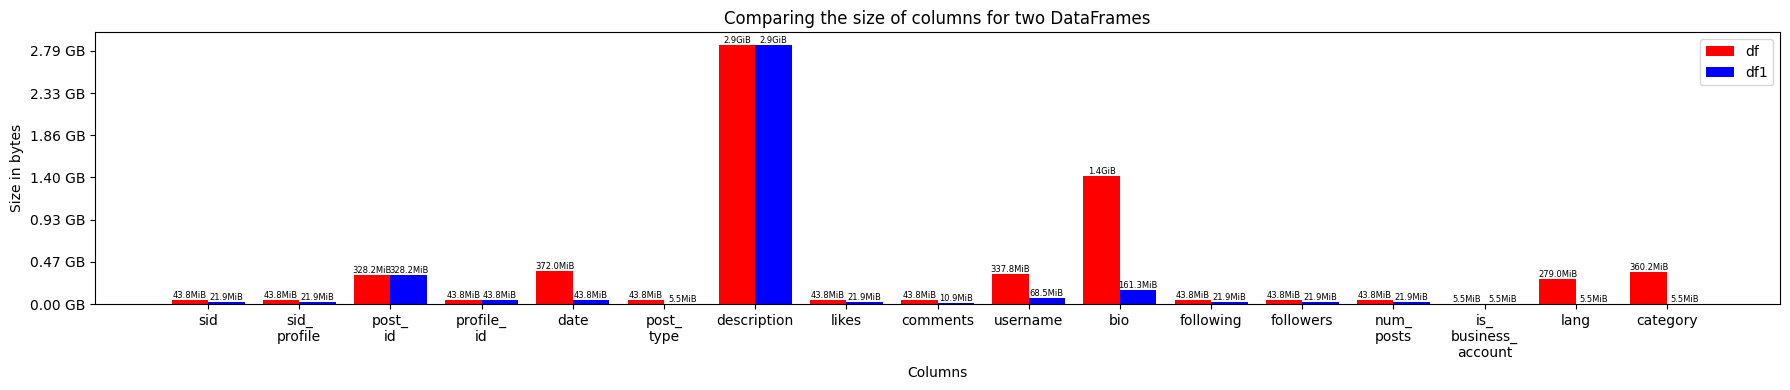

In [31]:
columns = df.columns
df_sizes_values = df.memory_usage(deep=True)[1:].values
df1_sizes_values = df1.memory_usage(deep=True)[1:].values

x = np.linspace(0, len(columns) - 1, len(columns))
width = 0.4

fig, ax = plt.subplots(figsize=(18, 4))
bars1 = ax.bar(x - width/2, df_sizes_values, width, color='red', label='df')
bars2 = ax.bar(x + width/2, df1_sizes_values, width, color='blue', label='df1')

for bar in bars1:
    y_val = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, y_val, size_of_format(y_val), ha='center', va='bottom', fontsize=6)

for bar in bars2:
    y_val = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, y_val, size_of_format(y_val), ha='center', va='bottom', fontsize=6)


ax.set_xlabel('Columns')
ax.set_ylabel('Size in bytes')
ax.set_title('Comparing the size of columns for two DataFrames')

wrapped_columns = [col.replace('_', '_\n') for col in columns]
ax.set_xticks(x)
ax.set_xticklabels(wrapped_columns)

ax.legend()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / (1024 ** 3):.2f} GB'))

plt.tight_layout()
plt.show()

### Task 3
Wykonaj 3 wybrane operacje (grupowanie + agregacja, filtrowanie, itp.) na całej ramce i zmierz czas wykonania na danych oryginalnych i zoptymalizowanych. Wyświetl te czasy.

In [32]:
start = datetime.now()
display(df.groupby(['post_type']).agg({'likes': ['mean']}))
print(f'Time: {datetime.now() - start}')

,likes
,mean
post_type,
1,422.68145
2,776.77826
3,553.68750


Time: 0:00:00.135495


In [33]:
start = datetime.now()
display(df1.groupby(['post_type']).agg({'likes': ['mean']}))
print(f'Time: {datetime.now() - start}')

C:\Users\Adam\AppData\Local\Temp\ipykernel_5796\3133398487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df1.groupby(['post_type']).agg({'likes': ['mean']}))


,likes
,mean
post_type,
1,422.68145
2,776.77826
3,553.68750


Time: 0:00:00.127448


In [37]:
start = datetime.now()
display(df[df['bio'].str.contains('bicycle', case=False, na=False)])
print(f'Time: {datetime.now() - start}')

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733793,41254166,4223298,BzeFFFpIayS,1277786910,2019-07-03 23:38:57,1,Friday evening @kring_brussels & @pasnormalstu...,119,7,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,travel_&_adventure
5733794,41254167,4223298,BzZ13IOIPkK,1277786910,2019-07-02 08:09:00,1,PlusOne Race - Brussels: \nI was very happy to...,145,4,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,sports
5733795,41254168,4223298,BzPj4ACImX8,1277786910,2019-06-28 08:19:26,1,Sunday @kring_brussels and @pasnormalstudios a...,143,6,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,sports
5733796,41254169,4223298,BzAoRpSo45c,1277786910,2019-06-22 13:09:17,1,To celebrate that @letourdefrance is coming to...,111,3,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,travel_&_adventure


Time: 0:00:07.079985


In [38]:
start = datetime.now()
display(df1[df1['bio'].str.contains('bicycle', case=False, na=False)])
print(f'Time: {datetime.now() - start}')

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733793,41254166,4223298,BzeFFFpIayS,1277786910,2019-07-03 23:38:57,1,Friday evening @kring_brussels & @pasnormalstu...,119,7,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,travel_&_adventure
5733794,41254167,4223298,BzZ13IOIPkK,1277786910,2019-07-02 08:09:00,1,PlusOne Race - Brussels: \nI was very happy to...,145,4,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,sports
5733795,41254168,4223298,BzPj4ACImX8,1277786910,2019-06-28 08:19:26,1,Sunday @kring_brussels and @pasnormalstudios a...,143,6,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,sports
5733796,41254169,4223298,BzAoRpSo45c,1277786910,2019-06-22 13:09:17,1,To celebrate that @letourdefrance is coming to...,111,3,felicevino,Riding bicycles\nRacing for @teamkring,971,2392,856,False,en,travel_&_adventure


Time: 0:00:01.246745


In [39]:
start = datetime.now()
display(df.sort_values(by='category'))
print(f'Time: {datetime.now() - start}')

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
4784820,39745896,3947023,Bw76t5Tnax-,8285970644,2019-05-02 00:11:26,1,#portraitphotography #portrait #bigben #london...,22,1,jrjp26,None,97,86,315,False,en,arts_&_culture
3628534,38114964,3717863,BxiSO-7goDD,190213356,2019-05-16 21:48:04,1,This little staple has so much character and c...,168,2,mandymalaya,love stronger than your pride .,1013,1488,388,False,en,arts_&_culture
4283097,38959428,3836730,BxHaPY7lMPC,373591917,2019-05-06 11:18:32,1,I didn’t do this in March because i didn’t par...,71,14,charlottegggg,Buildings and light 💕,1709,980,2596,False,en,arts_&_culture
2749875,21430032,2774261,Bxhz2tMnBYK,1428843383,2019-05-16 17:22:37,1,Just the tips of the soft golden Willow Leaf P...,28,5,chalk_info,Jewellery that cares. Sculptural creatures giv...,1226,2089,1244,True,en,arts_&_culture
2749876,21430039,2774261,Bxhz0trHnCp,1428843383,2019-05-16 17:22:20,1,Willow Leaf Pendants made from 18ct Yellow Gol...,35,7,chalk_info,Jewellery that cares. Sculptural creatures giv...,1226,2089,1244,True,en,arts_&_culture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417653,37812132,3676560,ByFAmlTFLrH,253060578,2019-05-30 09:27:25,1,Announcing the first part of our new timetable...,28,1,tomthevikingmma,"PRO MMA Athlete 4-0\nBJJ Purple belt, AVT BJJ ...",527,986,89,True,en,youth_&_student_life
5090427,40232511,4019747,BiFJ2dGlvhY,332774186,2018-04-27 18:25:56,1,Last day at school will miss everyone and hope...,162,2,walton___ad8189,None,2036,831,63,False,en,youth_&_student_life
3417766,37812281,3676577,Bx5fnoshsdO,1193952054,2019-05-25 22:07:34,1,3 years at uni done.. 1 more to go 🙌🏼 so so pr...,268,15,louisa_cole,🇬🇧| UK\n🐰| GymBunny and Sprinter\n🍑| Strength ...,981,2069,442,True,en,youth_&_student_life
4512937,39317823,3886691,Bwuve6mBm-L,262908399,2019-04-26 21:23:08,1,"This, is Kendall. If I see you on any kind of ...",116,4,josh_duncann,"""Church isn't a place, it's a people."" -Freeli...",496,591,173,False,en,youth_&_student_life


Time: 0:00:10.087022


In [40]:
start = datetime.now()
display(df1.sort_values(by='category'))
print(f'Time: {datetime.now() - start}')

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
4784820,39745896,3947023,Bw76t5Tnax-,8285970644,2019-05-02 00:11:26,1,#portraitphotography #portrait #bigben #london...,22,1,jrjp26,NaN,97,86,315,False,en,arts_&_culture
3628534,38114964,3717863,BxiSO-7goDD,190213356,2019-05-16 21:48:04,1,This little staple has so much character and c...,168,2,mandymalaya,love stronger than your pride .,1013,1488,388,False,en,arts_&_culture
4283097,38959428,3836730,BxHaPY7lMPC,373591917,2019-05-06 11:18:32,1,I didn’t do this in March because i didn’t par...,71,14,charlottegggg,Buildings and light 💕,1709,980,2596,False,en,arts_&_culture
2749875,21430032,2774261,Bxhz2tMnBYK,1428843383,2019-05-16 17:22:37,1,Just the tips of the soft golden Willow Leaf P...,28,5,chalk_info,Jewellery that cares. Sculptural creatures giv...,1226,2089,1244,True,en,arts_&_culture
2749876,21430039,2774261,Bxhz0trHnCp,1428843383,2019-05-16 17:22:20,1,Willow Leaf Pendants made from 18ct Yellow Gol...,35,7,chalk_info,Jewellery that cares. Sculptural creatures giv...,1226,2089,1244,True,en,arts_&_culture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417653,37812132,3676560,ByFAmlTFLrH,253060578,2019-05-30 09:27:25,1,Announcing the first part of our new timetable...,28,1,tomthevikingmma,"PRO MMA Athlete 4-0\nBJJ Purple belt, AVT BJJ ...",527,986,89,True,en,youth_&_student_life
5090427,40232511,4019747,BiFJ2dGlvhY,332774186,2018-04-27 18:25:56,1,Last day at school will miss everyone and hope...,162,2,walton___ad8189,NaN,2036,831,63,False,en,youth_&_student_life
3417766,37812281,3676577,Bx5fnoshsdO,1193952054,2019-05-25 22:07:34,1,3 years at uni done.. 1 more to go 🙌🏼 so so pr...,268,15,louisa_cole,🇬🇧| UK\n🐰| GymBunny and Sprinter\n🍑| Strength ...,981,2069,442,True,en,youth_&_student_life
4512937,39317823,3886691,Bwuve6mBm-L,262908399,2019-04-26 21:23:08,1,"This, is Kendall. If I see you on any kind of ...",116,4,josh_duncann,"""Church isn't a place, it's a people."" -Freeli...",496,591,173,False,en,youth_&_student_life


Time: 0:00:04.214820


### Task 4
Zapisz ramkę jako plik csv, z nagłówkami kolumn, bez indeksu. Sprawdź jaka jest różnica w wielkości pliku csv i sumy wielkości plików w formacie parquet (w eksploratorze, nie trzeba tego robić z poziomu kodu).

In [41]:
df1.to_csv('instagram.csv', header=True, index=False)

![Size comparison](lab_01/tasks/comparison.png)
<img src="comparison.png">
<img src="lab_01/tasks/comparison.png">


### Task 5
Zmierz czas wczytywania danych z pliku csv dla 3 przypadków:

* cały plik na raz,
* cały plik ze wskazaniem parametru chunksize (możesz poeksperymentować z wielkością tego parametru),
* z użyciem multiprocessingu zaprezentowanego w przykładzie (wcześniej podziel plik na kilka mniejszych), wskazując ilość procesów jako ilość_rdzeni - 2 oraz drugi przypadek (ilosc_rdzeni - 2) * 2.

In [48]:
@count_time
def read_file_1():
    return pd.read_csv('instagram.csv', header=0)
    
@count_time
def read_file_2():
    chunks = pd.read_csv('instagram.csv', header=0, chunksize=800_000)
    return pd.concat(chunks)

In [49]:
df1 = read_file_1()
df2 = read_file_2()

Reading time read_file_1: 0:01:27.480642 seconds
Reading time read_file_2: 0:01:41.638140 seconds


case 3:
![Task 5 picture](task_5.png)
